In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel.data import PanelData
from linearmodels.panel import PanelOLS, PooledOLS, RandomEffects, compare
import matplotlib.pyplot as plt
from plot_result import plot_result

In [2]:
df=pd.read_csv("../../data/merged/len4_ndb_agg_all_DropNever.csv",encoding="shift-jis",index_col=0)

In [3]:
df["log_quantity"]=np.log(df["総計"])
df["log_revenue"]=np.log(df["revenue"])
df["year_trend"]=df["year"]-2014
df=df.set_index(["id","year"])
df=PanelData(df,convert_dummies=False)

                          PanelOLS Estimation Summary                           
Dep. Variable:           log_quantity   R-squared:                        0.1378
Estimator:                   PanelOLS   R-squared (Between):              0.0675
No. Observations:                 256   R-squared (Within):           -1.119e+04
Date:                Sat, Sep 09 2023   R-squared (Overall):             -39.132
Time:                        22:50:00   Log-likelihood                    212.70
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      1.3485
Entities:                          32   P-value                           0.1412
Avg Obs:                       8.0000   Distribution:                  F(23,194)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):           9.91e+07
                            

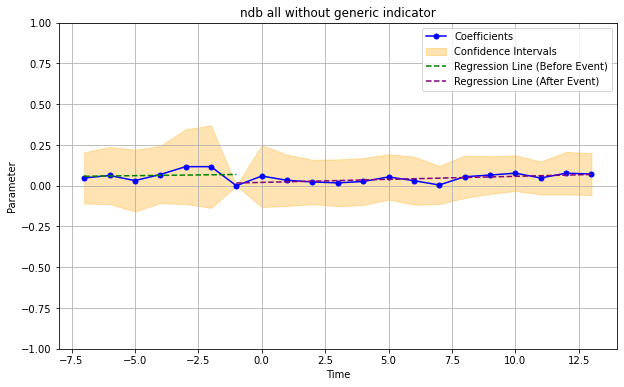

In [4]:
# all data
formula="log_quantity~ elapsed_m5+elapsed_m4+elapsed_m3+elapsed_m2+elapsed_m1+elapsed_0+elapsed_1+elapsed_2+elapsed_3+elapsed_4+elapsed_5+elapsed_6+elapsed_7+elapsed_8+elapsed_9+elapsed_10+TimeEffects+EntityEffects"

# till elapsed_20
formula="log_quantity~ elapsed_m5+elapsed_m4+elapsed_m3+elapsed_m2+elapsed_m1+elapsed_0+elapsed_1+elapsed_2+elapsed_3+elapsed_4+elapsed_5+elapsed_6+elapsed_7+elapsed_8+elapsed_9+elapsed_10+elapsed_11+elapsed_12+elapsed_13+elapsed_14+elapsed_15+TimeEffects+EntityEffects"


# add generic indicator
# formula+="+後発品区分"

# add generic per
# formula+="+generic_per"

formula+="+year_trend"
# generic_share_r
formula+=" + generic_share_r"
# generic_share_q
formula+=" + generic_share_q"

mod_fe=PanelOLS.from_formula(formula, data=df,check_rank=False,drop_absorbed=True)
res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
# print(res_fe.summary.tables[1])
# print(res_fe.summary.tables[0])
print(res_fe)
# plot_result(res_fe,file_name="ndb_all",title="ndb_all",start_from=1,period=15)
plot_result(res_fe,file_name="ndb_all_without_generic",title="ndb all without generic indicator",start_from=1,period=20)